# IRIS FLOWER CLASSIFICATION

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
iris_df = pd.read_csv("Iris.csv")
iris_df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


# Data Exploration

In [4]:
iris_df.shape

(150, 6)

In [5]:
#basic info of data
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [26]:
#checking statistical summary of data
iris_df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
#Checking null values
iris_df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

##### --there is no NULL values in dataset

In [8]:
print("unique number of values in dataset Species:",iris_df["Species"].nunique())
print("Unique Species in iris dataset:",iris_df["Species"].unique())

unique number of values in dataset Species: 3
Unique Species in iris dataset: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


##### --There is 3 species in iris dataset i.e 'Iris-setosa','Iris-versicolor','Iris-virginica.

# EXPLORATORY DATA ANALYSIS

## Data Visualization:-

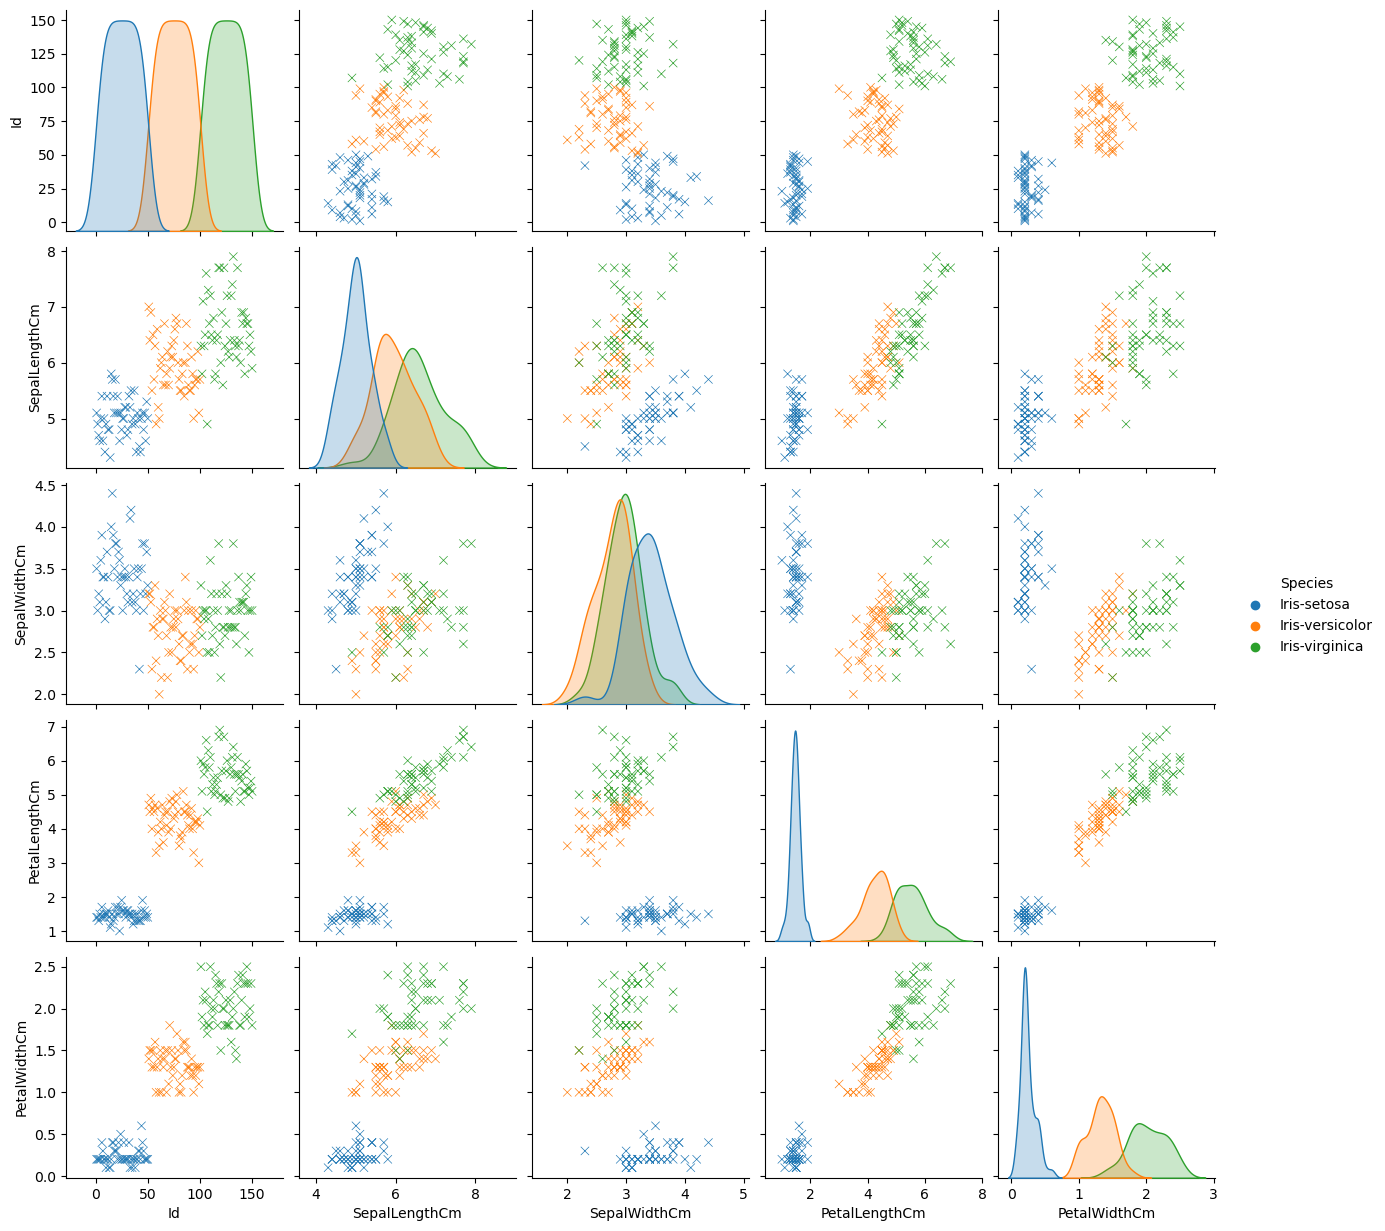

In [11]:
sns.pairplot(iris_df, hue = "Species",markers = "x")
plt.show()

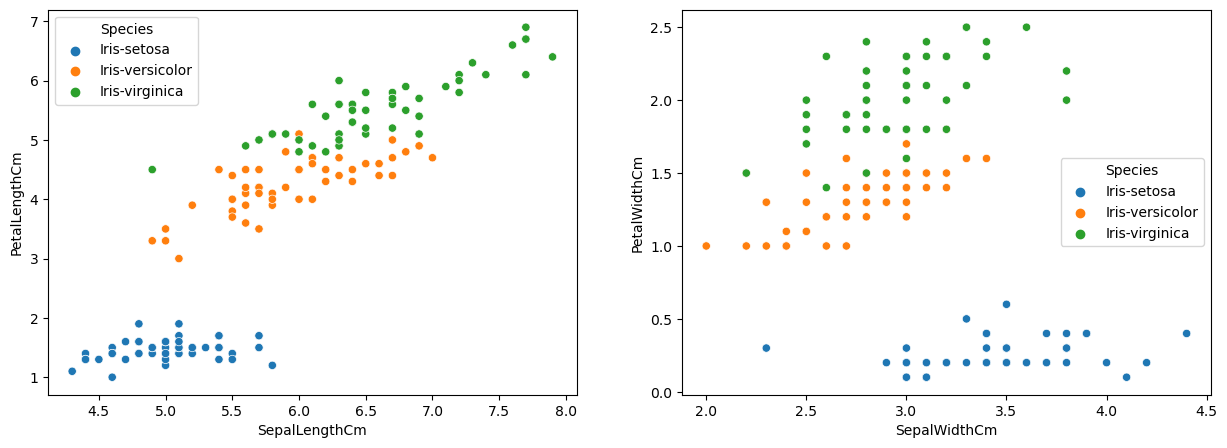

In [14]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.scatterplot(x='SepalLengthCm',y='PetalLengthCm',data=iris_df,hue='Species')
plt.subplot(1,2,2)
sns.scatterplot(x='SepalWidthCm',y='PetalWidthCm',data=iris_df,hue='Species')
plt.show()

In [15]:
#Correlation in Dataset
iris_df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


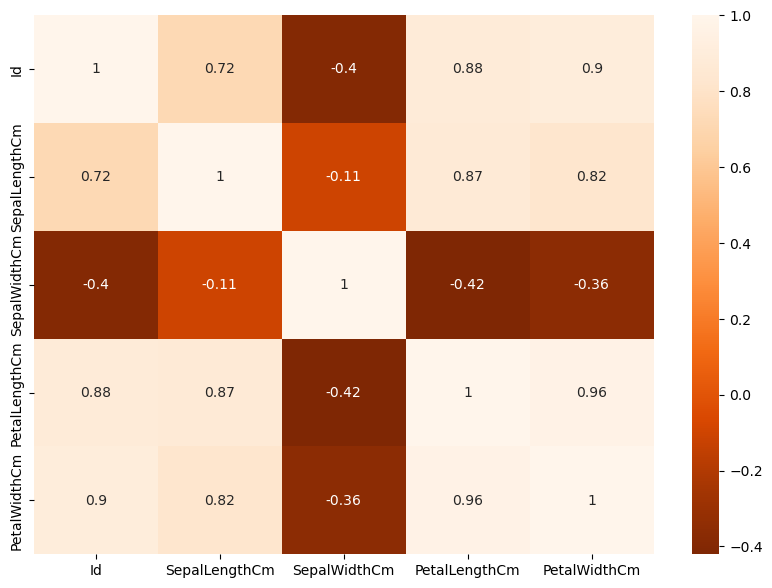

In [22]:
#Heatmap to see correlation.
plt.figure(figsize=(10,7))
sns.heatmap(iris_df.corr(),annot = True,cmap = "Oranges_r")
plt.show()

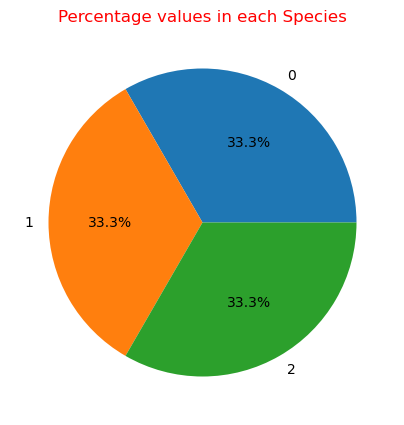

In [64]:
 # Check value counts
iris_df["Species"].value_counts().plot(kind="pie",autopct = "%1.1f%%", figsize=(5,5))
plt.title("Percentage values in each Species", fontsize = 12 , c = "r")
plt.ylabel("",fontsize=10,c="r")
plt.show()

# --from pie chart we can clearly say that ,all species hs equal values
<ul>
    <li>Iris-Setosa:50/150</li>
    <li>Iris- Versicolor:50/150</li>
    <li>Iris- Virginica :50/150</li>
</ul>

#### Scatterplot for Sepal length and Sepal width

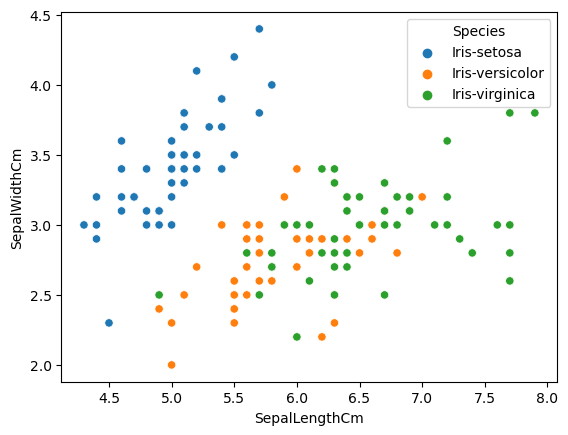

In [27]:
sns.scatterplot(iris_df["SepalLengthCm"], iris_df["SepalWidthCm"], hue = iris_df["Species"])
plt.show()

#### Scatterplot for Petal length and Petal width

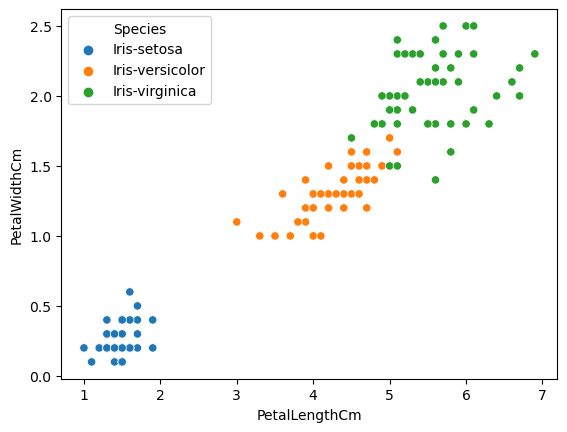

In [28]:
sns.scatterplot(iris_df["PetalLengthCm"], iris_df["PetalWidthCm"], hue = iris_df["Species"])
plt.show()

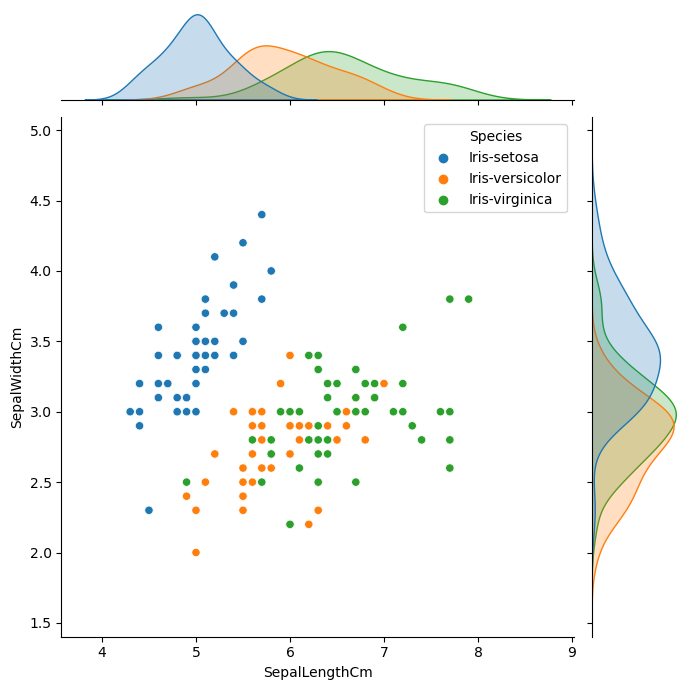

In [29]:
sns.jointplot(data = iris_df , x = "SepalLengthCm", y = "SepalWidthCm" , size = 7 , hue = "Species")
plt.show()

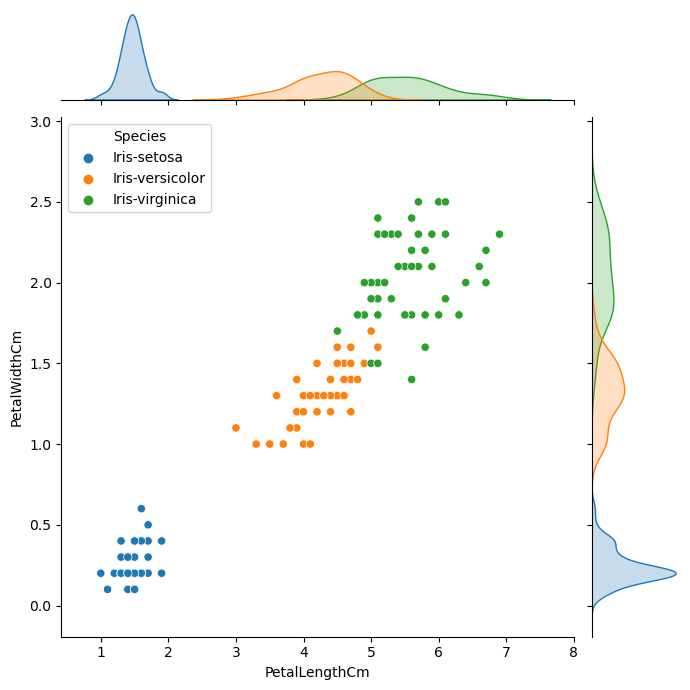

In [30]:
sns.jointplot(data = iris_df , x = "PetalLengthCm", y = "PetalWidthCm" , size = 7 , hue = "Species")
plt.show()

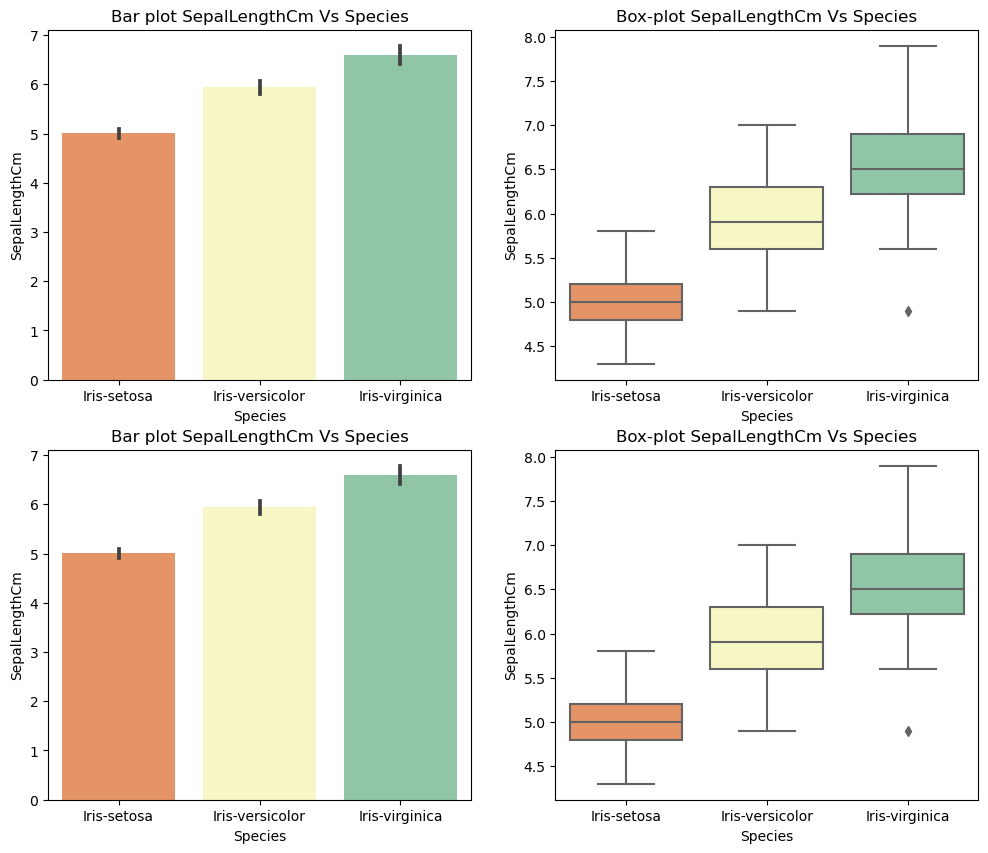

In [42]:
plt.figure(figsize = (12,10))
plt.subplot(2,2,1)
sns.barplot(x = "Species",y = "SepalLengthCm", data=iris_df, palette=("Spectral"))
plt.title("Bar plot SepalLengthCm Vs Species")
plt.subplot(2,2,2)
sns.boxplot(x = "Species",y = "SepalLengthCm", data=iris_df, palette=("Spectral"))
plt.title("Box-plot SepalLengthCm Vs Species")
plt.subplot(2,2,3)
sns.barplot(x = "Species",y = "SepalLengthCm", data=iris_df, palette=("Spectral"))
plt.title("Bar plot SepalLengthCm Vs Species")
plt.subplot(2,2,4)
sns.boxplot(x = "Species",y = "SepalLengthCm", data=iris_df, palette=("Spectral"))
plt.title("Box-plot SepalLengthCm Vs Species")
plt.show()

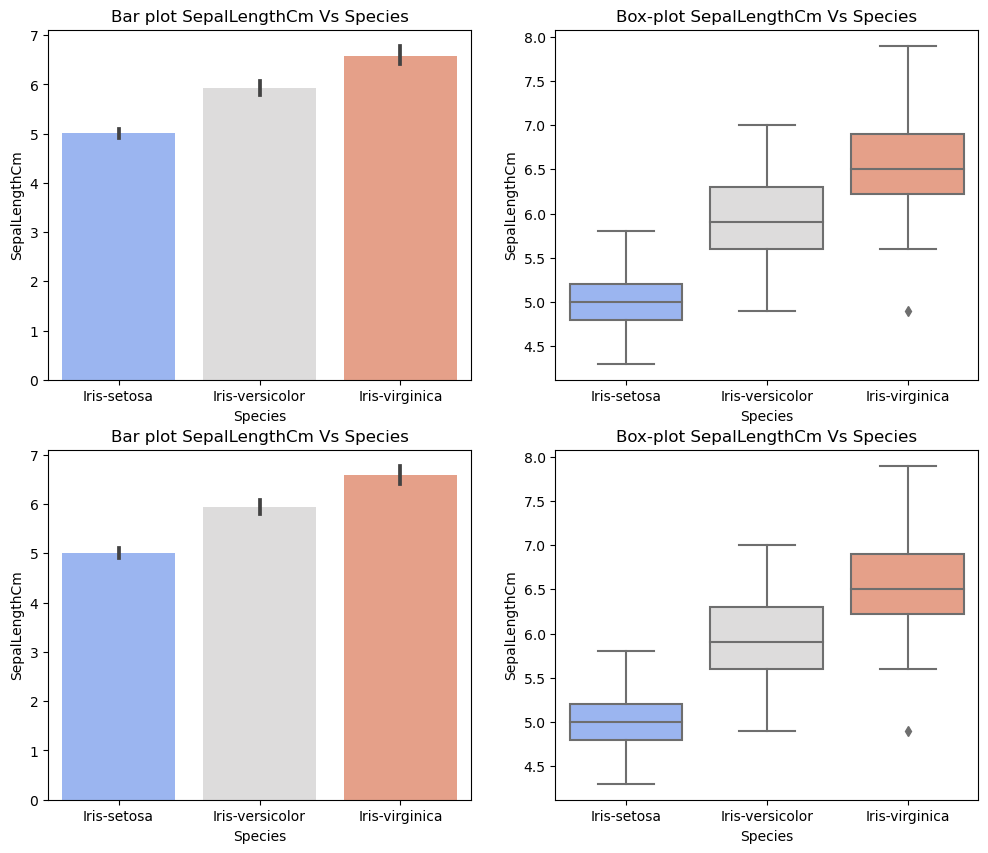

In [43]:
plt.figure(figsize = (12,10))
plt.subplot(2,2,1)
sns.barplot(x = "Species",y = "SepalLengthCm", data=iris_df, palette=("coolwarm"))
plt.title("Bar plot SepalLengthCm Vs Species")
plt.subplot(2,2,2)
sns.boxplot(x = "Species",y = "SepalLengthCm", data=iris_df, palette=("coolwarm"))
plt.title("Box-plot SepalLengthCm Vs Species")
plt.subplot(2,2,3)
sns.barplot(x = "Species",y = "SepalLengthCm", data=iris_df, palette=("coolwarm"))
plt.title("Bar plot SepalLengthCm Vs Species")
plt.subplot(2,2,4)
sns.boxplot(x = "Species",y = "SepalLengthCm", data=iris_df, palette=("coolwarm"))
plt.title("Box-plot SepalLengthCm Vs Species")
plt.show()

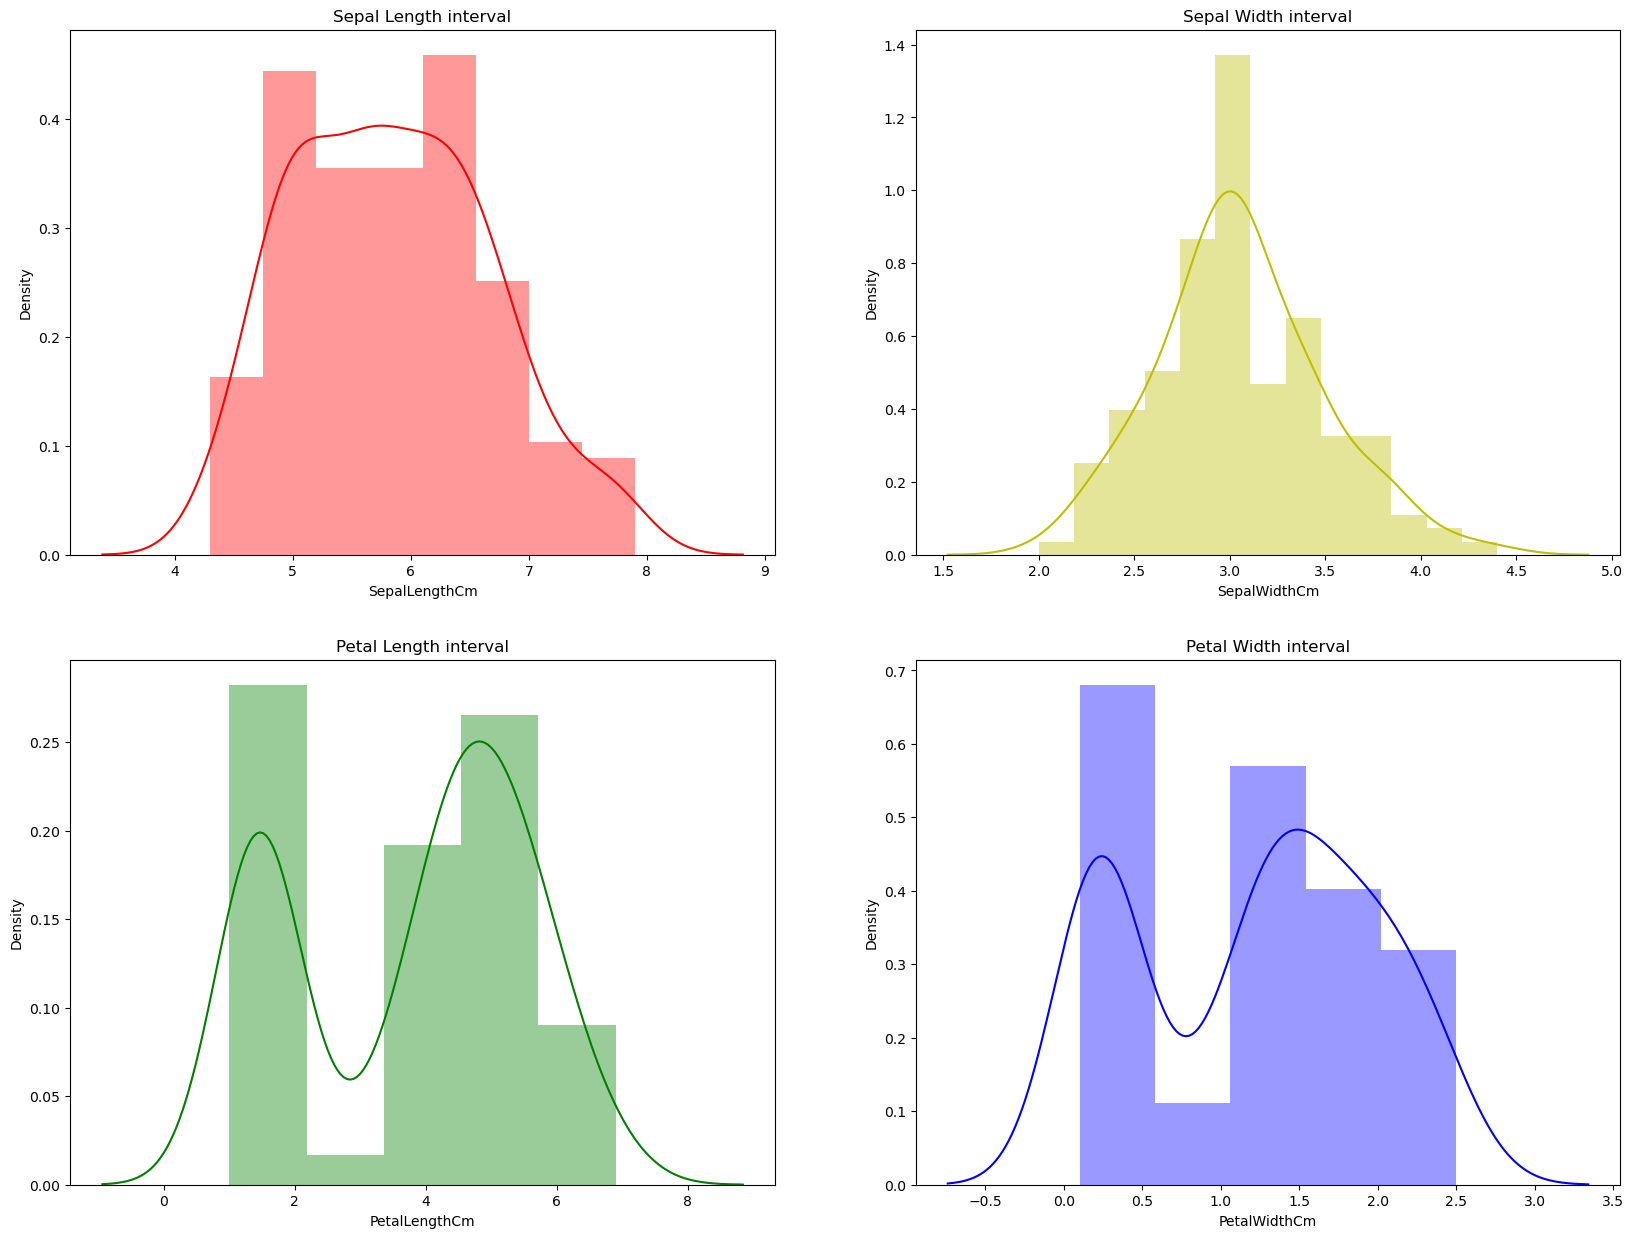

In [45]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
sns.distplot(iris_df["SepalLengthCm"],color="r").set_title("Sepal Length interval")
plt.subplot(2,2,2)
sns.distplot(iris_df["SepalWidthCm"],color="y").set_title("Sepal Width interval")
plt.subplot(2,2,3)
sns.distplot(iris_df["PetalLengthCm"],color="g").set_title("Petal Length interval")
plt.subplot(2,2,4)
sns.distplot(iris_df["PetalWidthCm"],color="b").set_title("Petal Width interval")
plt.show()

### **Data Cleaning**

In [46]:
# Change Categorical Data into numerical value
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
iris_df["Species"] = le.fit_transform(iris_df["Species"])
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [47]:
iris_df['Species'].unique()

array([0, 1, 2])

In [48]:
X = iris_df.iloc[:,[0,1,2,3]]
X.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm
0,1,5.1,3.5,1.4
1,2,4.9,3.0,1.4
2,3,4.7,3.2,1.3
3,4,4.6,3.1,1.5
4,5,5.0,3.6,1.4


In [49]:
y = iris_df.iloc[:, - 1]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int32

In [50]:
print(X.shape)
print(y.shape)

(150, 4)
(150,)


# MODEL BUILDING

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [53]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


### **Logistic Regression**

In [74]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(X_train, y_train)
print("**Logistic regression successfully implemented**")
y_pred = lr.predict(X_test)


#Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:-")
print(cm)
accuracy = accuracy_score(y_test, y_pred)
print("\naccuracy is:-",accuracy*100)
print("\nClassification Report:-\n")
print(classification_report(y_test,y_pred))

**Logistic regression successfully implemented**

Confusion Matrix:-
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]

accuracy is:- 100.0

Classification Report:-

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### **Random Forest Classifier**

In [75]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
print("--Random Forest Classifier successfully Implimented--")
y_pred = rfc.predict(X_test)


#confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:- ")
print(cm)

#accuracy test
accuracy = accuracy_score(y_test,y_pred)
print("\naccuracy:- ", accuracy*100)
print("\nClassification Report:-\n")
print( classification_report(y_test, y_pred))

--Random Forest Classifier successfully Implimented--

Confusion Matrix:- 
[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]

accuracy:-  96.66666666666667

Classification Report:-

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.93      1.00      0.96        13
           2       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30



### **Decison Tree**

In [76]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
print("!!Decision Tree Algorithm is successfully implimented!!")
y_pred = dtree.predict(X_test)

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:- ")
print(cm)

#accuracy test
accuracy = accuracy_score(y_test,y_pred)
print("\naccuracy:- ", accuracy*100)
print("\nClassification Report:-\n")
print( classification_report(y_test, y_pred))

!!Decision Tree Algorithm is successfully implimented!!

Confusion Matrix:- 
[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]

accuracy:-  96.66666666666667

Classification Report:-

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.93      1.00      0.96        13
           2       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30



In [67]:
from sklearn.tree import plot_tree

# for visualziing the Decision Tree
feature = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
classes = ['Iris-Setosa','Iris-Versicolor','Iris-Virginica']

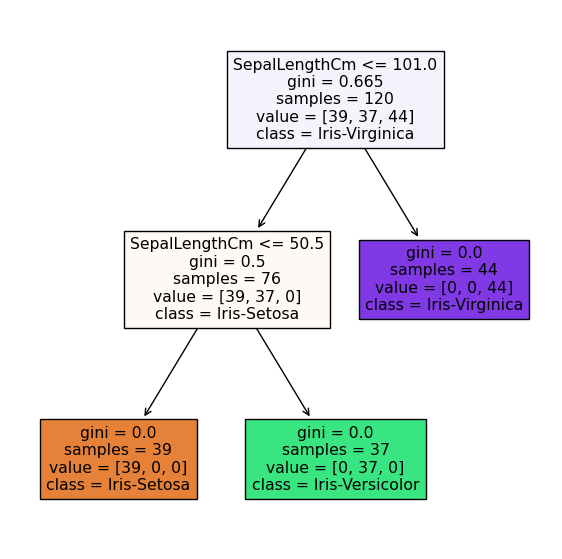

In [69]:
plt.figure(figsize=(7,7))
plot_tree(dtree, feature_names = feature, class_names = classes, filled = True);

### **Support Vector Machine**

In [73]:
from sklearn.svm import SVC
svc= SVC()
svc.fit(X_train, y_train)
print("Support vector classifier is successfully implemented")
y_pred = svc.predict(X_test)

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:- ")
print(cm)

#accuracy test
accuracy = accuracy_score(y_test,y_pred)
print("\naccuracy:- ", accuracy*100)
print("\nClassification Report:-\n")
print(classification_report(y_test, y_pred))

Support vector classifier is successfully implemented

Confusion Matrix:- 
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]

accuracy:-  100.0

Classification Report:-

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### **K-NN Classifier**

In [77]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 7)
knn.fit(X_train, y_train)
print("K-Nearest Neighbors classifier is successfully implemented")
y_pred = knn.predict(X_test)

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:- ")
print(cm)

#accuracy test
accuracy = accuracy_score(y_test,y_pred)
print("\naccuracy:- ", accuracy*100)
print("\nClassification Report:-\n")
print(classification_report(y_test, y_pred))

K-Nearest Neighbors classifier is successfully implemented

Confusion Matrix:- 
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]

accuracy:-  100.0

Classification Report:-

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### **Naive Bayes**

In [79]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print("Naive Bayes is successfully implemented")
y_pred = gnb.predict(X_test)

#confusion matrix
cm = confusion_matrix(y_pred, y_test)
print("\nConfusion Matrix:- ")
print(cm)

# Accuracy test
accuracy = accuracy_score(y_test, y_pred)
print("\naccuracy:- ", accuracy*100)
print("\nClassification Report:-\n")
print(classification_report(y_test, y_pred))

Naive Bayes is successfully implemented

Confusion Matrix:- 
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]

accuracy:-  100.0

Classification Report:-

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## RESULT

<ol>
    <li> Accuracy of Logistic Regression :- 100%</li>
    <li> Accuracy of Random Forest Classifier:- 100%</li>
    <li> Accuracy of Decision Tree : :- 96.6%</li>
    <li> Accuracy of Support Vector Machine :- 100%</li>
    <li> Accuracy of K-NN Classifier : :- 100%</li>
    <li> Accuracy of Naive Bayes :- 100%</li>
</ol>

### TEST MODEL

In [84]:
input_data=(2.1,7.9,4.5,0.02)

#changing the input data to a numpy array
input_data_as_nparray = np.asarray(input_data)

#reshape the data as we are predicting the label for only the instance
input_data_reshaped = input_data_as_nparray.reshape(1,-1)

prediction = dtree.predict(input_data_reshaped)
print("The category is",prediction)

The category is [0]
